# Data processing

In [1920]:
import numpy as np
import pandas as pd

Importing the data and creating a copy for back up reason.

In [1922]:
loan_data_bkp = pd.read_csv("/Users/yuanyi/credit_model/loan_data_2007_2014.csv")
loan_data = loan_data_bkp.copy() 

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3266: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


##### Exploring data

Enabling all columns to be observable in pandas data frame. Checking the data.

In [1925]:
pd.options.display.max_columns = None
loan_data.head()
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


Checking column names and data types that they have.

In [1927]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [1928]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

We have to change some data types since they are not in the format as we would like to have. 

#### Initial data preprocessing to shape the data

In [1931]:
loan_data['emp_length'].unique() #Employment length in years

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We manipulate (deleting specific parts of strings) strings and cast them as numbers. Creating new column named 'emp_length_int'.

In [1933]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','').str.replace('< 1 year',str(0)).str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','').str.replace(' year','')
loan_data['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [1934]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

Checking the type of data.

In [1936]:
type(loan_data['emp_length_int'][0])

numpy.float64

Term variable also needs preprocessing. 

In [1938]:
type(loan_data['term'][0])

str

In [1939]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1940]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months',''))

In [1941]:
loan_data['term_int'].unique()

array([36, 60])

In [1942]:
type(loan_data['term_int'][0])

numpy.int64

We also cast date variables as dates (currently, they are strings.)

earliest_cr_line ---The month the borrower's earliest reported credit line was opened

In [1945]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y',errors='coerce')   # 出错的先设为 NaT

set baseline date

In [1947]:
loan_data['todays_date'] = pd.to_datetime('2017-12-01')

If the parsed date is later than the reference date (indicating it was misinterpreted as 20xx), 100 years are subtracted.

In [1949]:
mask = loan_data['earliest_cr_line_date'] > loan_data['todays_date']
loan_data.loc[mask, 'earliest_cr_line_date'] = (
    loan_data.loc[mask, 'earliest_cr_line_date'] - pd.DateOffset(years=100)
)

calculate the number of months between the earliest credit line date and 2017-12-01.

In [1951]:
loan_data['Days_since_earliest_cr_line'] = loan_data['todays_date']-loan_data['earliest_cr_line_date']

the length of their credit history in months

In [1953]:
loan_data['mths_since_earliest_cr_line'] = round(loan_data['Days_since_earliest_cr_line']/ np.timedelta64(1,'M'))

In [1954]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

validate the dates

In [1956]:
loan_data.loc[[1472,1580, 3282], 'earliest_cr_line']

1472    Feb-04
1580    Sep-62
3282    Sep-67
Name: earliest_cr_line, dtype: object

In [1957]:
loan_data.loc[[1472,1580, 3282], 'earliest_cr_line_date']

1472   2004-02-01
1580   1962-09-01
3282   1967-09-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

We will be doing the simillar preprocessing for issue_date.

In [1959]:
loan_data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [1960]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y',errors='coerce')

In [1961]:
mask = loan_data['issue_d_date'] > loan_data['todays_date']
loan_data.loc[mask, 'issue_d_date'] = loan_data.loc[mask, 'issue_d_date'] - pd.DateOffset(years=100)

loan_data['Days_since_issue_d'] = loan_data['todays_date'] - loan_data['issue_d_date']

loan_data['mths_since_issue_d'] = np.round(
    loan_data['Days_since_issue_d'] / np.timedelta64(1, 'M')
)

loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

#### Preprocessing discreate variables(features)

Creating dummy variables for; Grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status

In [1964]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [1965]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [1966]:
loan_data_dummies = pd.concat([pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')],
                              axis = 1)

In [1967]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [1968]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

# Add the dummy variable columns back to the original loan_data DataFrame

In [1970]:
loan_data = pd.concat([loan_data,loan_data_dummies], axis = 1)

In [1971]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

#### Checking missing values and cleaing

In [1973]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,todays_date,Days_since_earliest_cr_line,mths_since_earliest_cr_line,issue_d_date,Days_since_issue_d,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [1974]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

Variables that we will need for the analysis: annual_inc, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, total_acc, acc_now_delinq, total_rev_hi_lim, emp_length_int, mths_since_earliest_cr_line

In [1976]:
pd.options.display.max_rows = 100

Impute missing total_rev_hi_lim values using funded_amnt.

In [1978]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['total_rev_hi_lim'].isnull().sum()

0

Missing values in annual_inc were imputed with the mean annual income.

In [1980]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace = True)
loan_data['annual_inc'].isnull().sum()

0

In [1981]:
loan_data['mths_since_earliest_cr_line'].fillna(int(0), inplace = True)
loan_data['acc_now_delinq'].fillna(int(0), inplace = True)
loan_data['total_acc'].fillna(int(0), inplace = True)
loan_data['pub_rec'].fillna(int(0), inplace = True)
loan_data['open_acc'].fillna(int(0), inplace = True)
loan_data['inq_last_6mths'].fillna(int(0), inplace = True)
loan_data['delinq_2yrs'].fillna(int(0), inplace = True)
loan_data['emp_length_int'].fillna(int(0), inplace = True)

In [1982]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [1983]:
loan_data['loan_status'].value_counts() 

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [1984]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Defaults as 0, Non Defaults as 1.

We recoded loan status into a binary good/bad variable for classification modeling.

In [1987]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Late (31-120 days)','Default', 'Charged Off', 
                                                                'Does not meet the credit policy. Status:Charged Off']),0,1)

## PD Model - Data Preparation
#### Dependent Variable, Good/Bad Definition 

#### Independent Variables

Fine Classing : bundling continous variables.\
Weight of evidence : to what extent an independent variable would predict a dependent variable. \
Coarse Classing : The process of constructing new categories based on the initial ones.(combining fine classing groups based on weight of evidence.)\
Information value : How much information the original independent variable brings with respect to explaining the dependent variable.

#### Splitting Data (Training - Test)

In [1992]:
from sklearn.model_selection import train_test_split

In [1993]:
loan_data.shape

(466285, 211)

In [1994]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), 
                                                                                                                  loan_data['good_bad'], 
                                                                                                                  test_size = 0.2,
                                                                                                                  random_state = 42)

#### Data Preparation

In [1996]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train
#df_inputs_prepr = loan_data_inputs_test
#df_targets_prepr = loan_data_targets_test


We will calculate Weight of Evidence with 'grade' variable.

In [1998]:
df_inputs_prepr['grade'].unique() 

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

Creating a new data frame for 'grade' versus 'good_bad'.

In [2000]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis = 1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


Weight of Evidence formula = Ln(%Good/%Bad) \
https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

Explanation of the formula: ln of a number which is bigger than 1 (meaning that % of good is more than % of bad) is positive, otherwise negative.

In [2002]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


Since previous step counts all values per Grades, we could make the ratio of goods (1's) by having the mean method.

In [2004]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


Merging these 2 dfs and changing column names to have them more intuitive.

In [2006]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis =1)
df1 = df1.iloc[:,[0,1,3]]

In [2007]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop of good']

In [2008]:
df1.iloc[:,[1]].sum()

n_obs    373028
dtype: int64

In [2009]:
df1['n_good'] = df1['prop of good'] * df1['n_obs']
df1['n_bad'] = (1-df1['prop of good']) * df1['n_obs']
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

Checking and sorting per WoE. 

In [2011]:
df1 = df1.sort_values(['WoE']); df1 = df1.reset_index(drop = True)

In [2012]:
df1

,grade,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,109730,0.921015,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,59759,0.961044,57431.0,2328.0,0.172855,0.057090,1.107830


To see absolute change (difference) from one row above;

In [2014]:
df1['diff_prop_good'] = df1['prop of good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [2015]:
df1['Info Val'] = (df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']
df1['Info Val'] = df1['Info Val'].sum()

In [2016]:

df1['IV_partial'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']

In [2017]:
df1

,grade,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val,IV_partial
0,G,2654,0.727958,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636,0.013240
1,F,10530,0.754416,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636,0.038537
2,E,28612,0.805257,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636,0.045645
3,D,61498,0.846304,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636,0.029445
4,C,100245,0.885770,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636,0.000671
5,B,109730,0.921015,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636,0.032850
6,A,59759,0.961044,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636,0.128248


#### Creating a function which automates actions being done in previous step, for other variables.

In [2019]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis =1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop of good']
    df['n_good'] = df['prop of good'] * df['n_obs']
    df['n_bad'] = (1-df['prop of good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE']); df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop of good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['Info Val'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['Info Val'] = df['Info Val'].sum()
    return df

#### Visualizing Results

In [2021]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Creating a function that plots WoE in Y axis and variables in X axis. 

In [2023]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:,0].apply(str)); y = df_WoE['WoE']
    plt.figure(figsize = (18,6)) # Figsize(width, heigth)
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k') # marker 'o' means dot. 
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    plt.show()
    
    

Trying 2 functions created in previous steps.

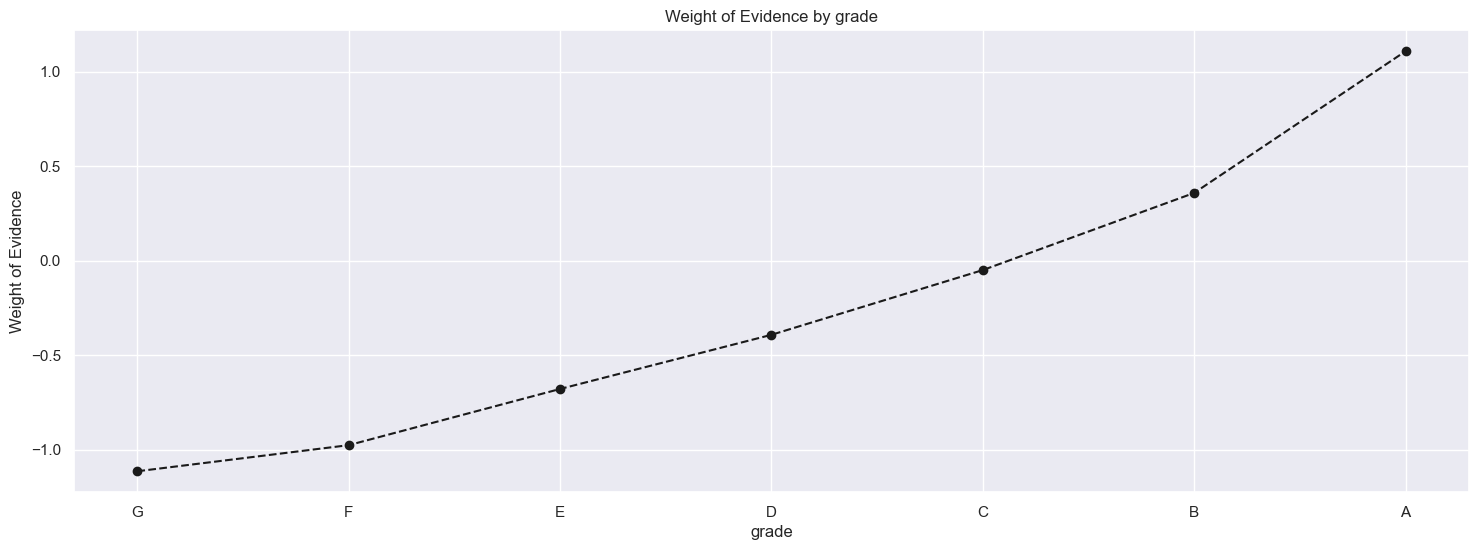

In [2025]:
plot_by_woe(woe_discrete(df_inputs_prepr,'grade',df_targets_prepr))

Grade A has the highest WOE, indicating it represents the lowest-risk borrowers.

#### Preprocessing discrete variables: creating dummy variables (I)

We choose the variable with lowest weight of evidence as reference variable.

In [2029]:
temp_df = woe_discrete(df_inputs_prepr,'home_ownership', df_targets_prepr)
temp_df

,home_ownership,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,OTHER,137,0.795620,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


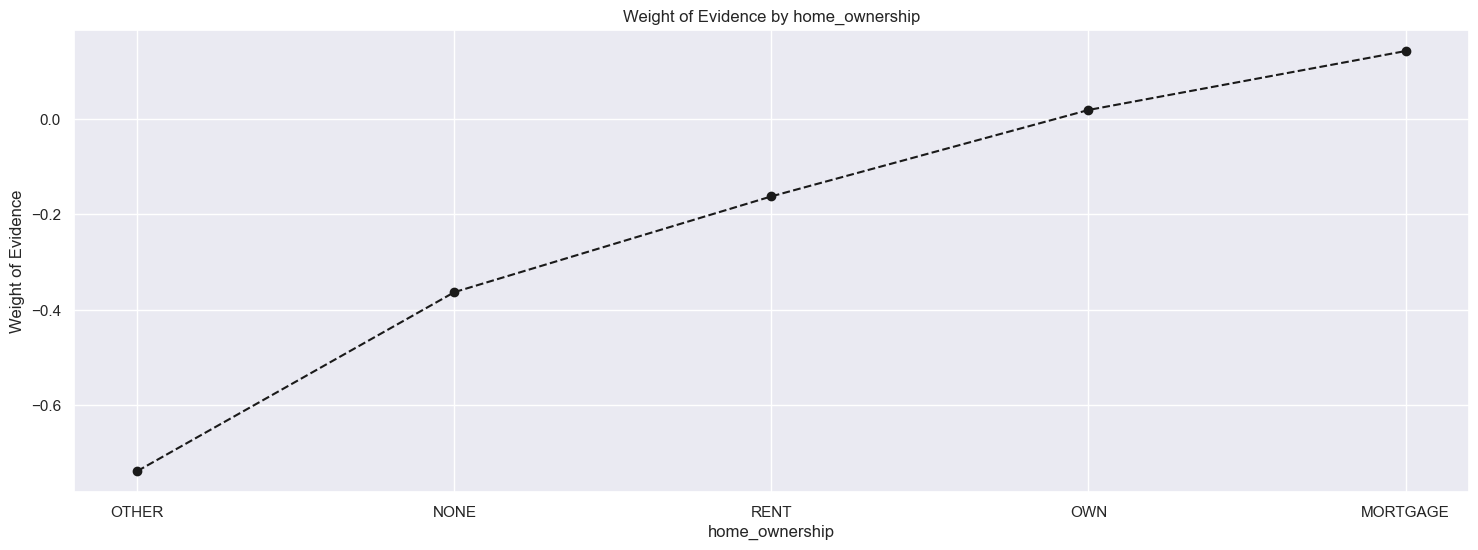

In [2030]:
plot_by_woe(temp_df)

Borrowers with a mortgage have the highest WOE

We will combine some variables into one variable since they are not represented as much as other ones.

In [2033]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

#### Preprocessing discrete variables: creating dummy variables (II)

In [2035]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [2036]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,NE,13,0.461538,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


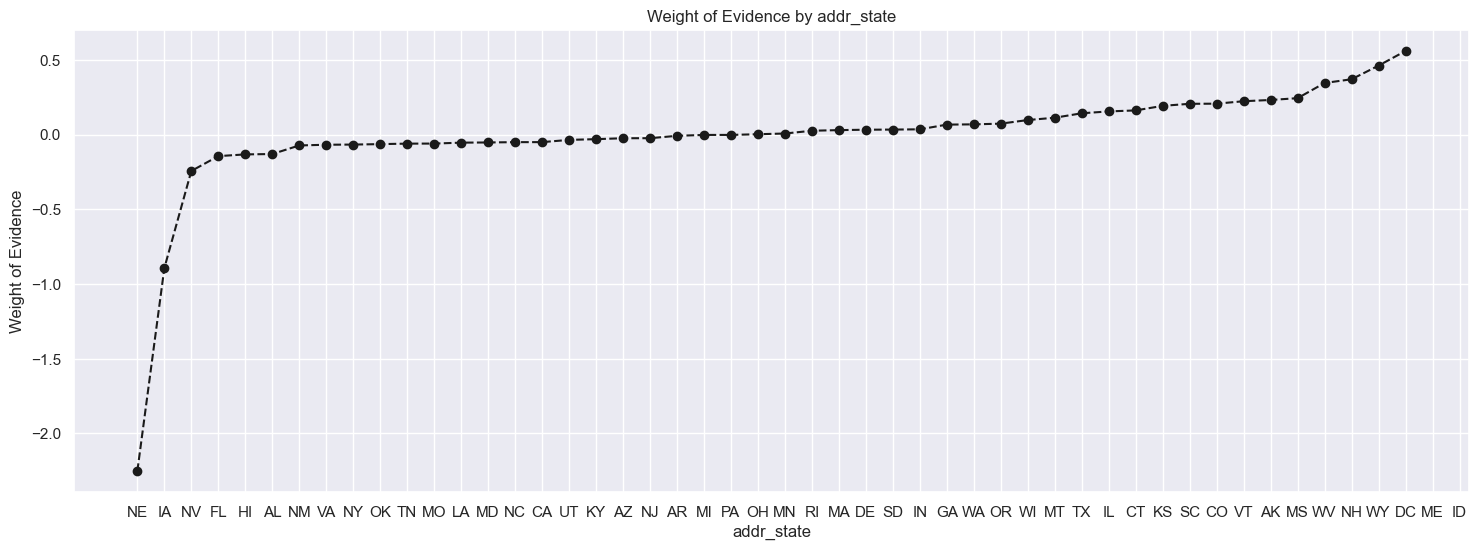

In [2037]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [2038]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

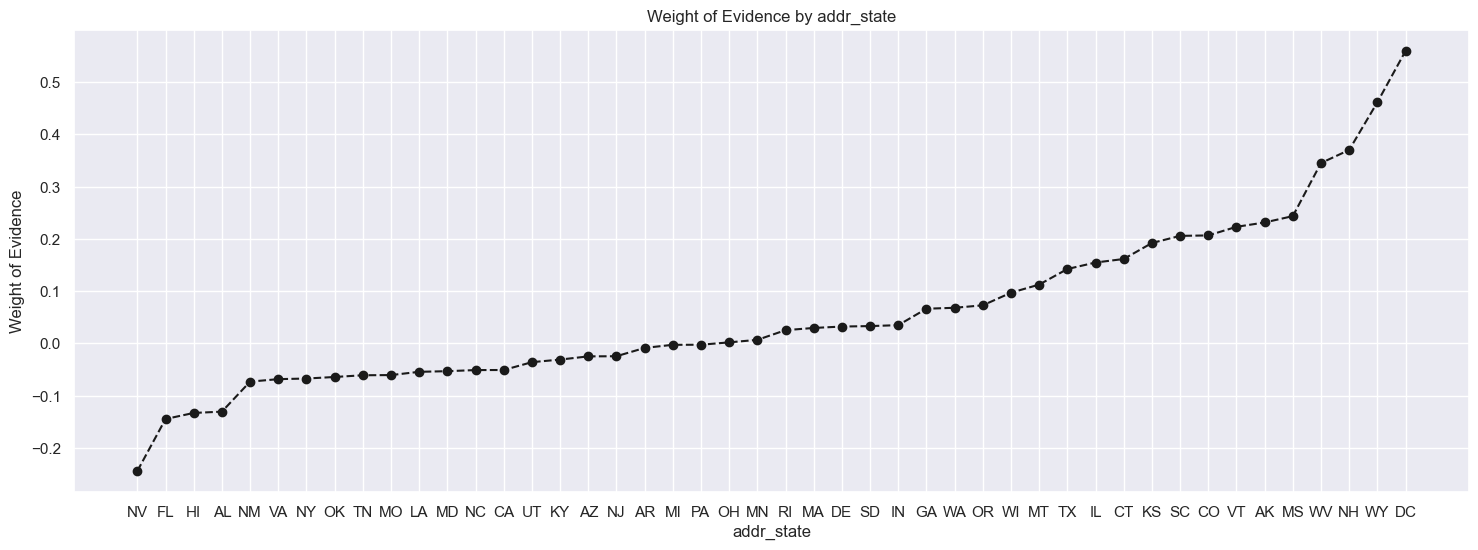

In [2039]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

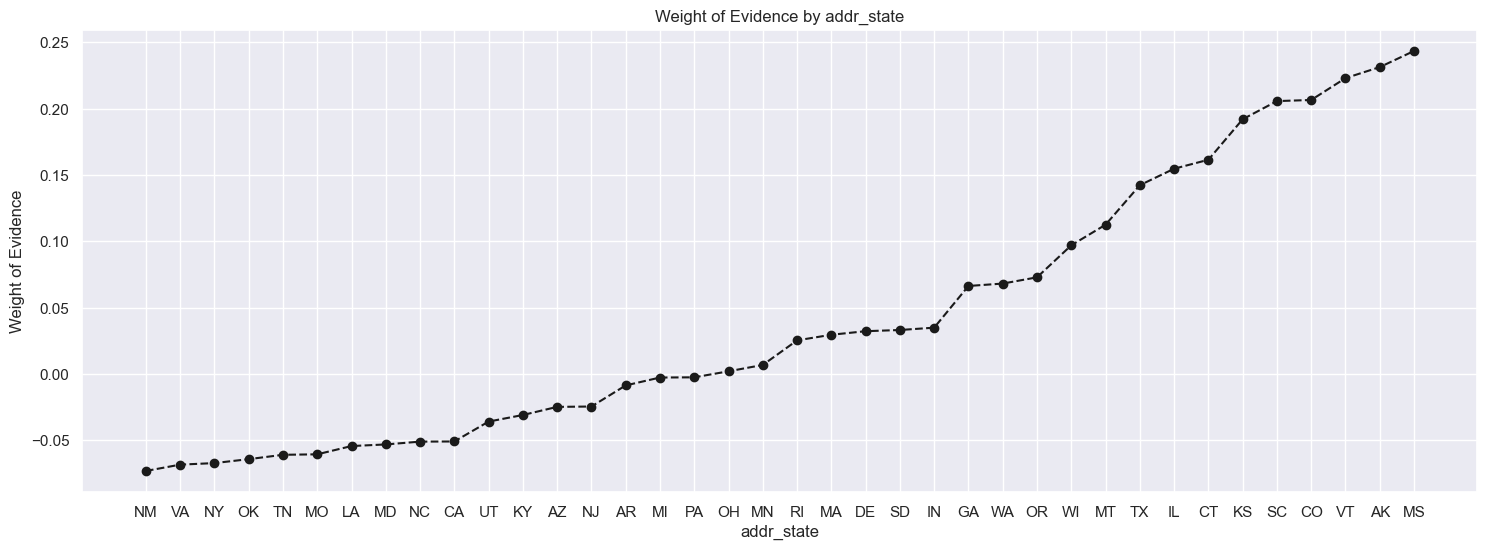

In [2040]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [2041]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [2042]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,Verified,134414,0.872781,117314.0,17100.0,0.353090,0.419344,-0.171969,NaN,NaN,0.020384
1,Source Verified,120030,0.895918,107537.0,12493.0,0.323663,0.306366,0.054922,0.023137,0.226891,0.020384
2,Not Verified,118584,0.905679,107399.0,11185.0,0.323248,0.274290,0.164232,0.009761,0.109311,0.020384


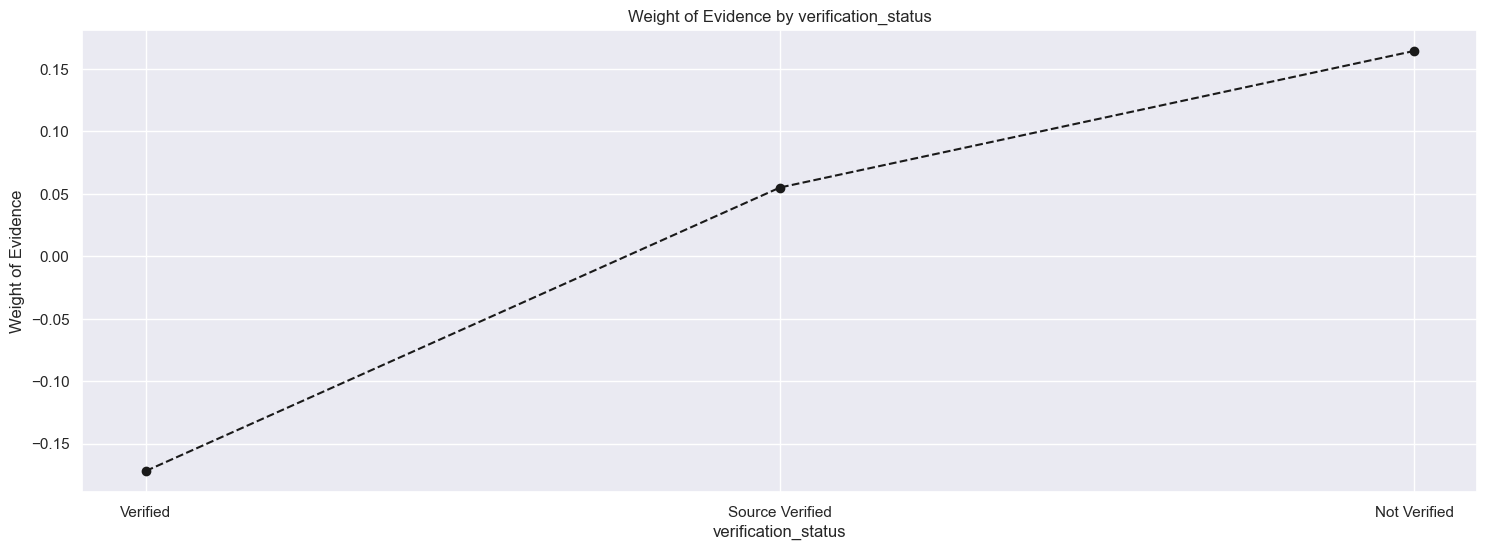

In [2043]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [2044]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,small_business,5582,0.786098,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


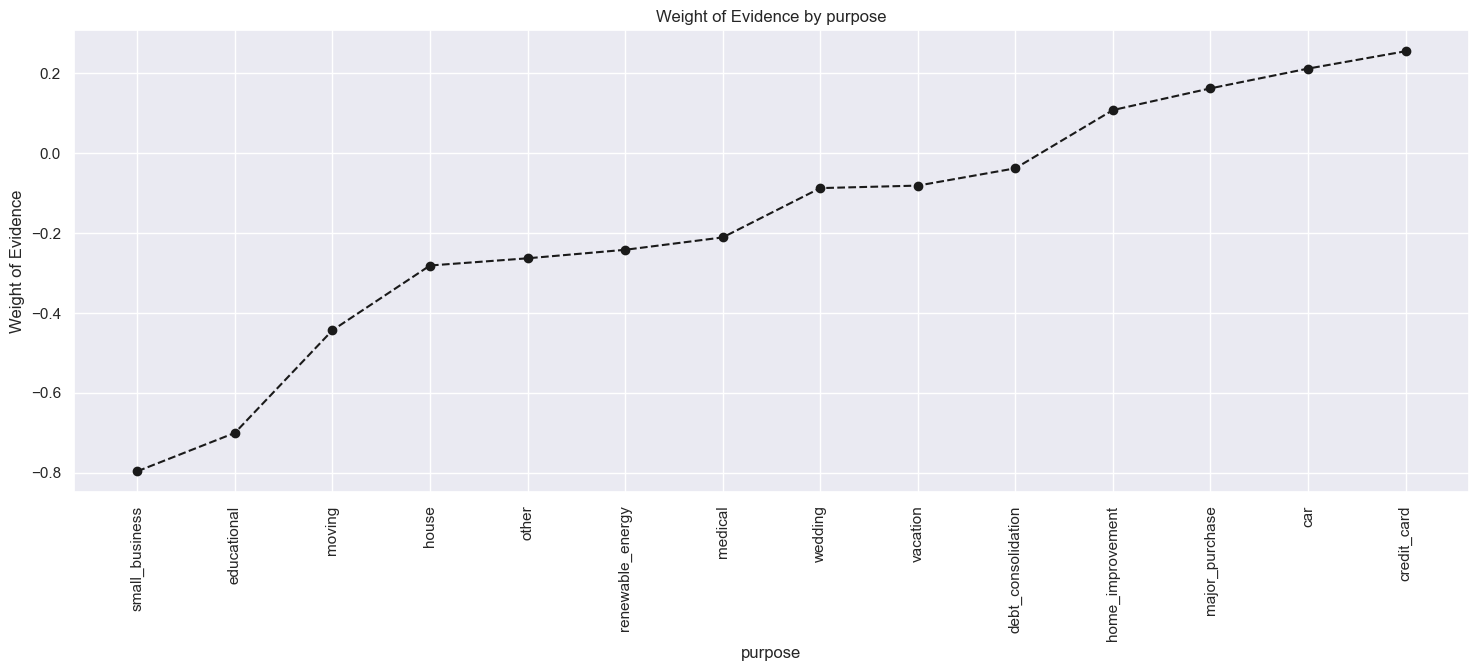

In [2045]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [2046]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

The initial listing status indicates whether the loan was initially listed as a whole loan (‘W’) or as a fractional loan (‘F’).”

In [2048]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop of good,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,Info Val
0,f,242514,0.879694,213338.0,29176.0,0.642101,0.715484,-0.108214,NaN,NaN,0.02478
1,w,130514,0.911105,118912.0,11602.0,0.357899,0.284516,0.229461,0.031412,0.337675,0.02478


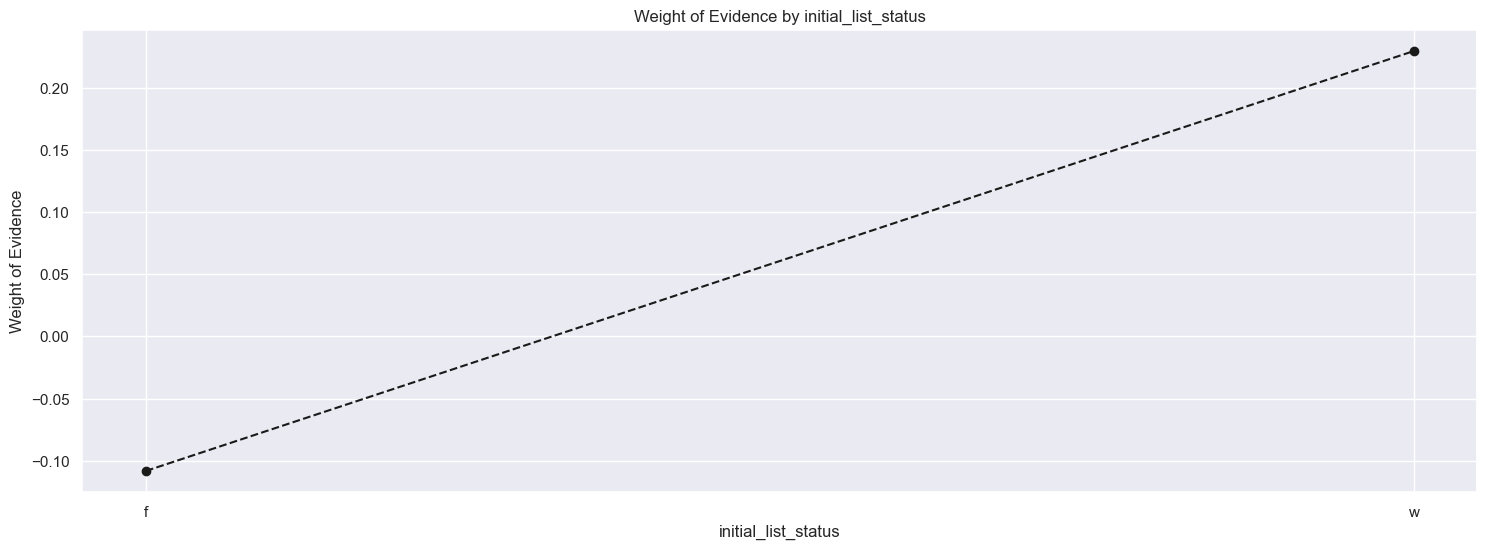

In [2049]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

#### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [2051]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

#### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [2053]:
# term 
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60])

In [2054]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


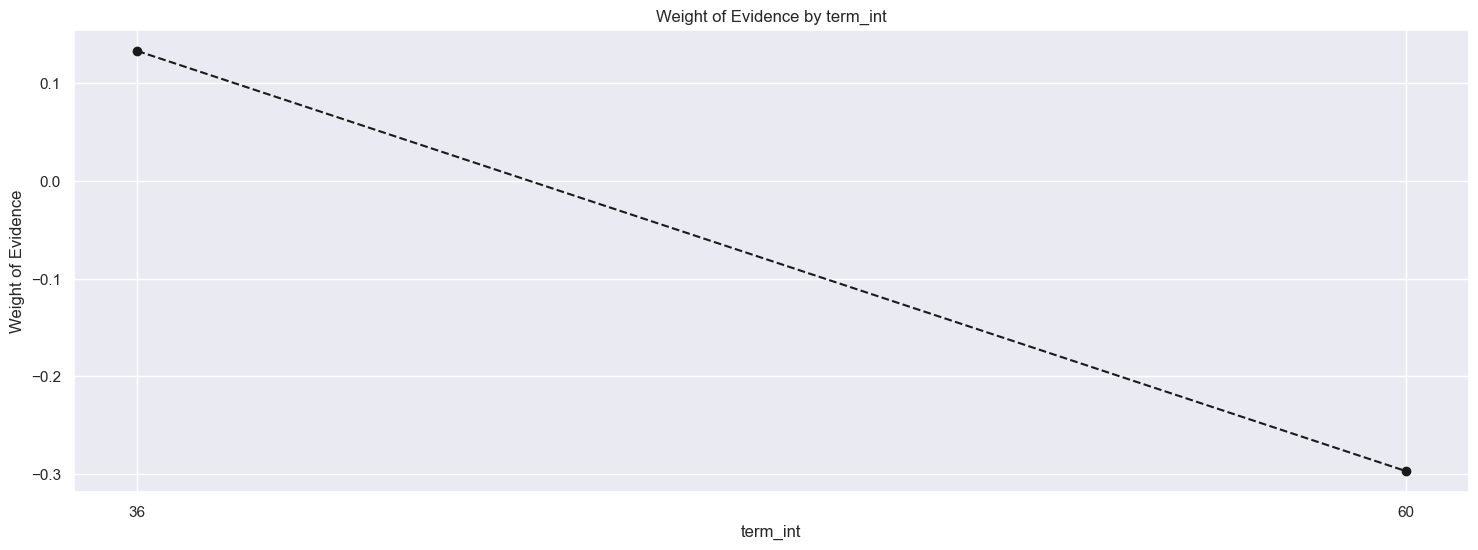

In [2055]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [2056]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [2057]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [2058]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


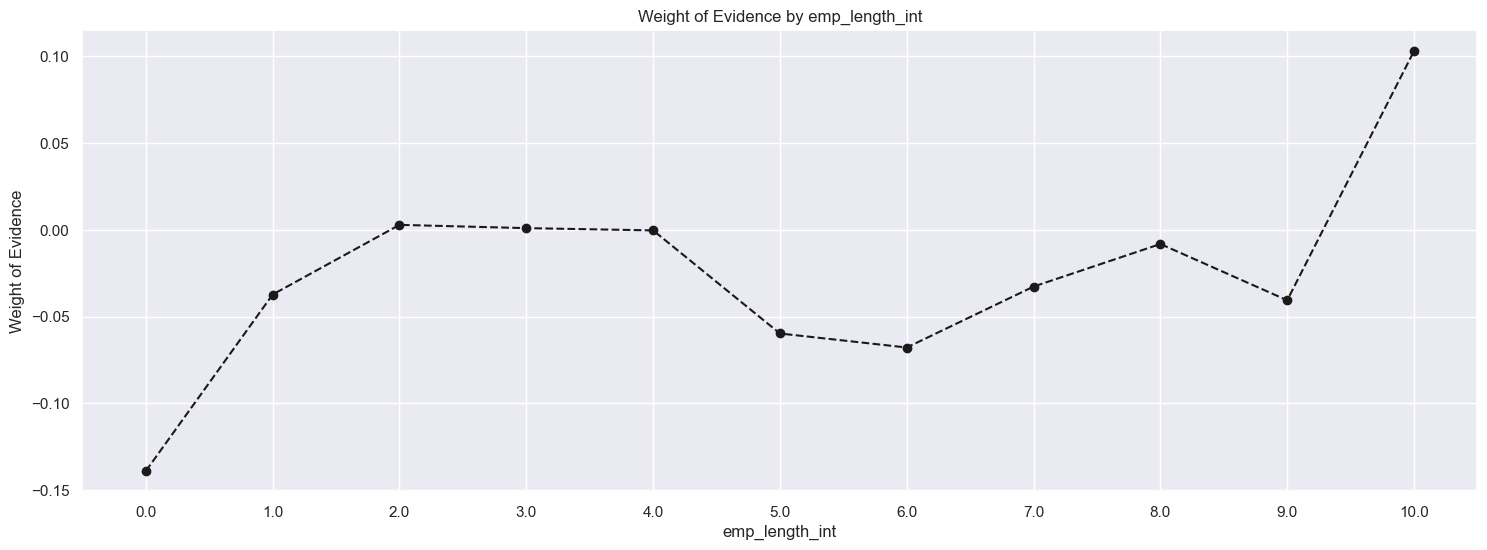

In [2059]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [2060]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

#### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [2062]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [2064]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [2065]:
df_inputs_prepr['mths_since_issue_d_factor']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [2066]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113186
1,"(37.8, 39.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113186
2,"(39.6, 41.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113186
3,"(41.4, 43.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113186
4,"(43.2, 45.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.006815,0.079447,0.113186
5,"(45.0, 46.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.030041,0.091740,0.002486,0.027758,0.113186
6,"(46.8, 48.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.060621,0.087315,0.000401,0.004425,0.113186
7,"(48.6, 50.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.062902,-0.023972,0.010572,0.111287,0.113186
8,"(50.4, 52.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.060474,-0.100350,0.007804,0.076378,0.113186
9,"(52.2, 54.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.059787,-0.224240,0.013660,0.123890,0.113186


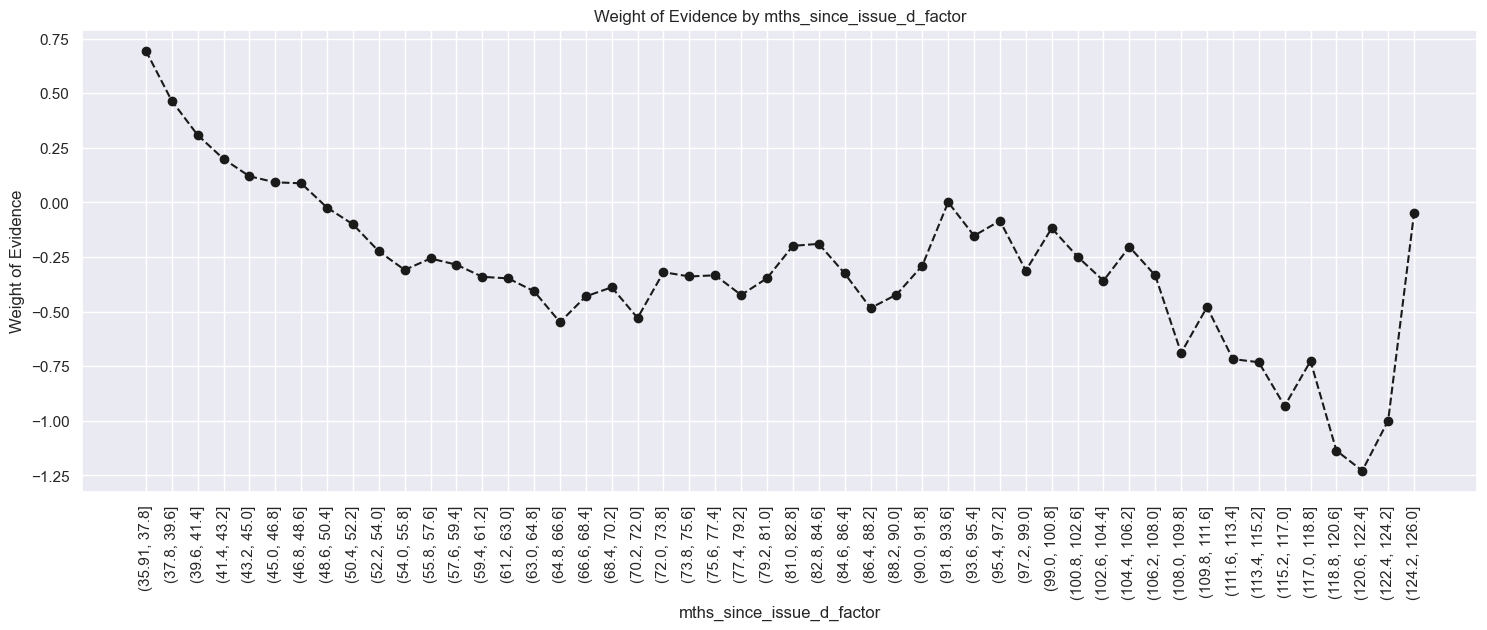

In [2067]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

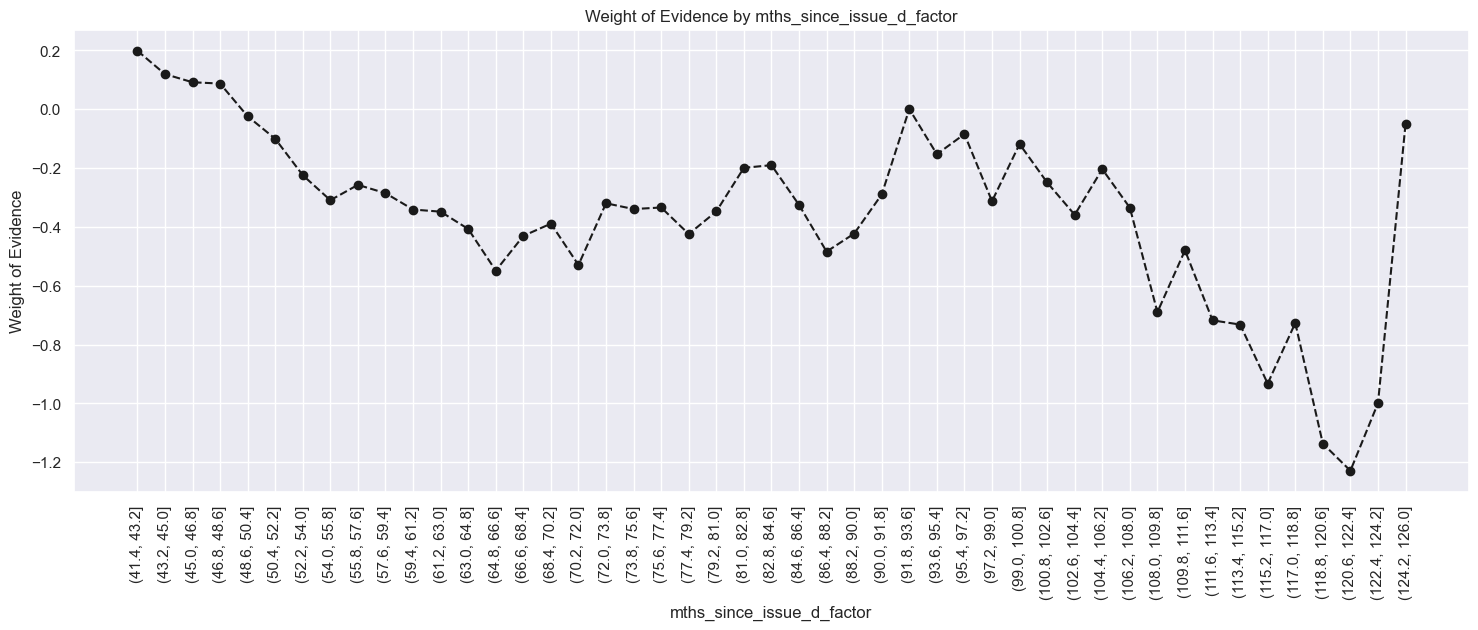

In [2068]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [2069]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [2070]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [2071]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,NaN,NaN,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.018592,0.685659,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.008871,0.382053,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.001512,0.056092,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.003438,0.139824,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.014131,0.484710,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.013011,0.310252,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.015958,0.394768,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.027857,0.618250,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.026513,0.578889,0.343349


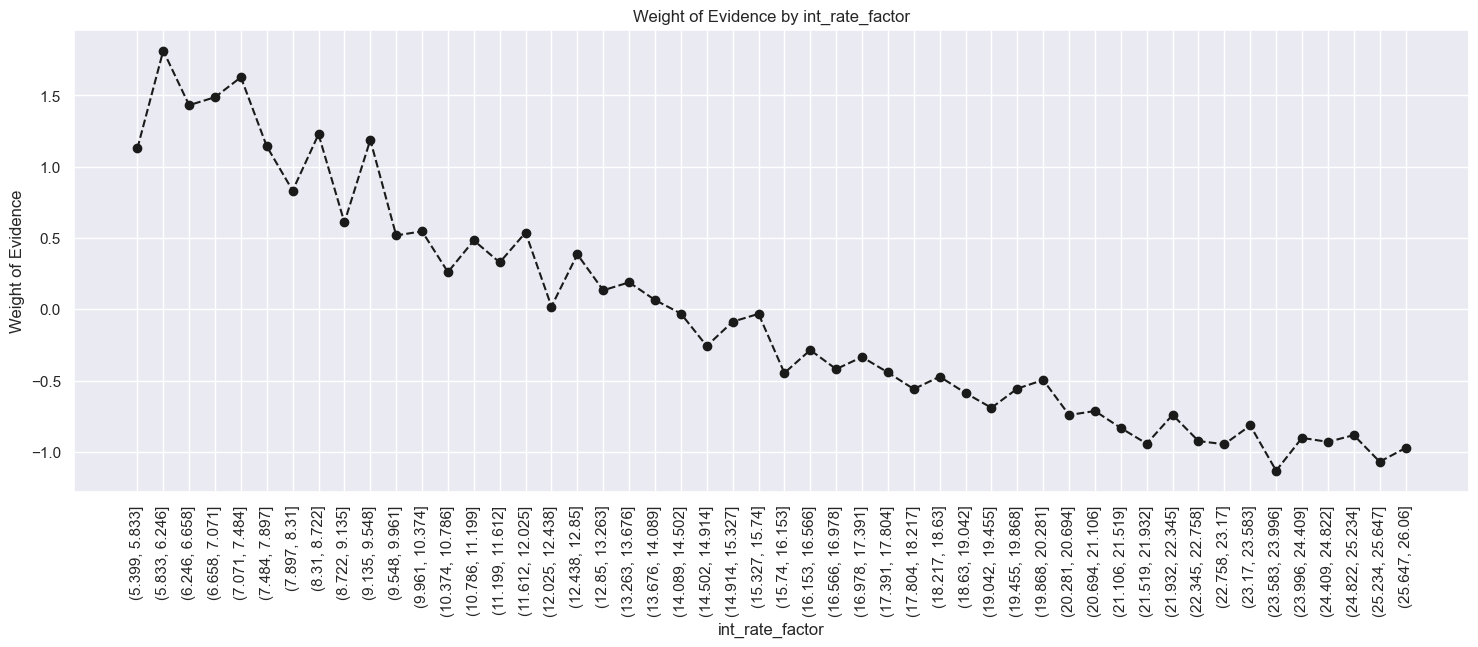

In [2072]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [2073]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [2074]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [2075]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,NaN,NaN,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.001332,0.015427,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.010078,0.110941,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.004746,0.049048,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.002529,0.025902,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.024131,0.002689,0.000656,0.006774,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.042057,0.015238,0.001213,0.012549,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.039703,0.168806,0.013910,0.153568,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.019054,-0.031094,0.018449,0.199900,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.029526,0.077648,0.010399,0.108742,0.014139


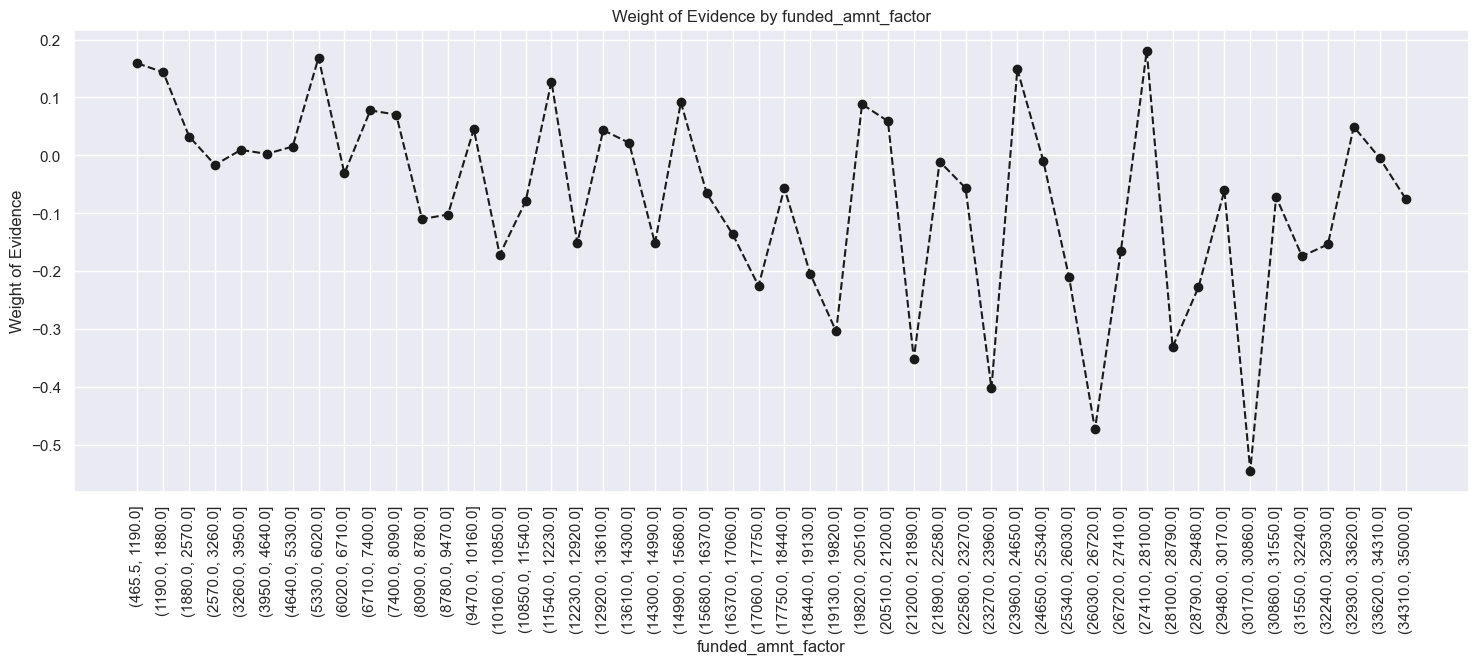

In [2076]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

#### Data Preparation: Continuous Variables, Part 1 and 2: Homework

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


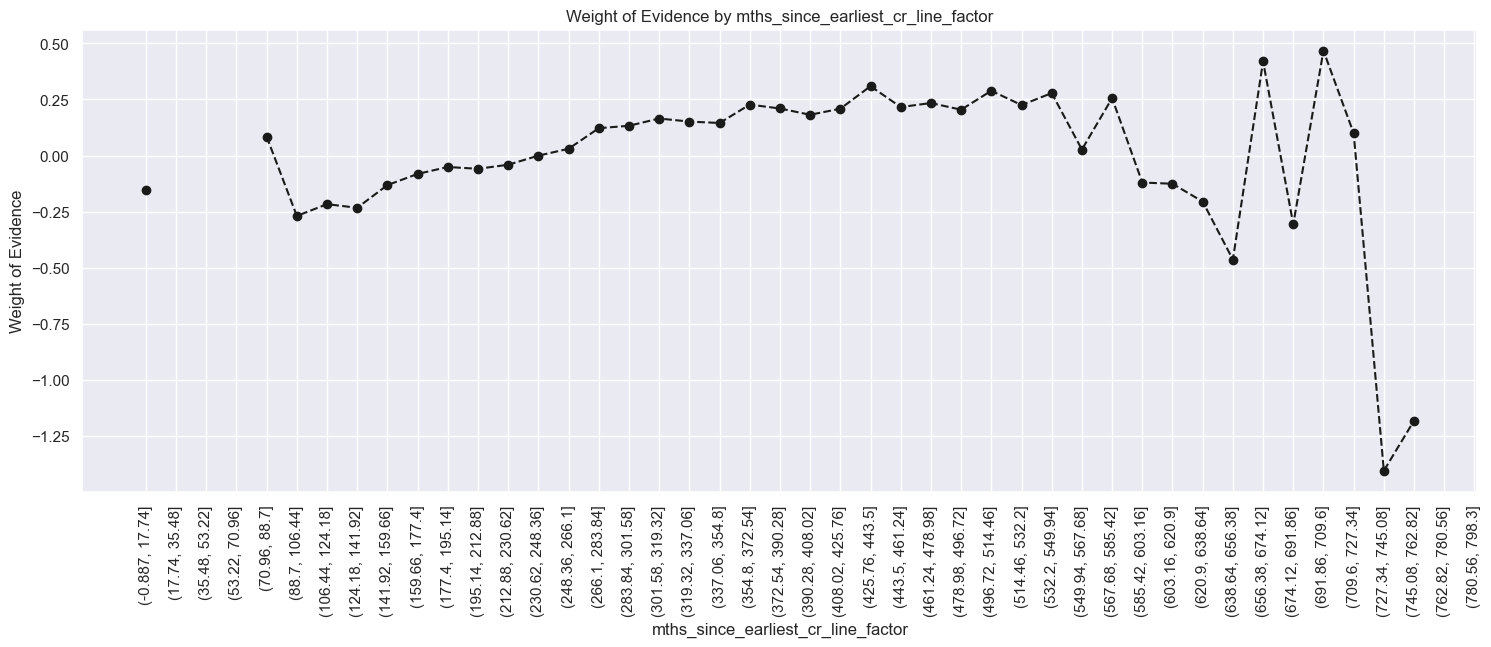

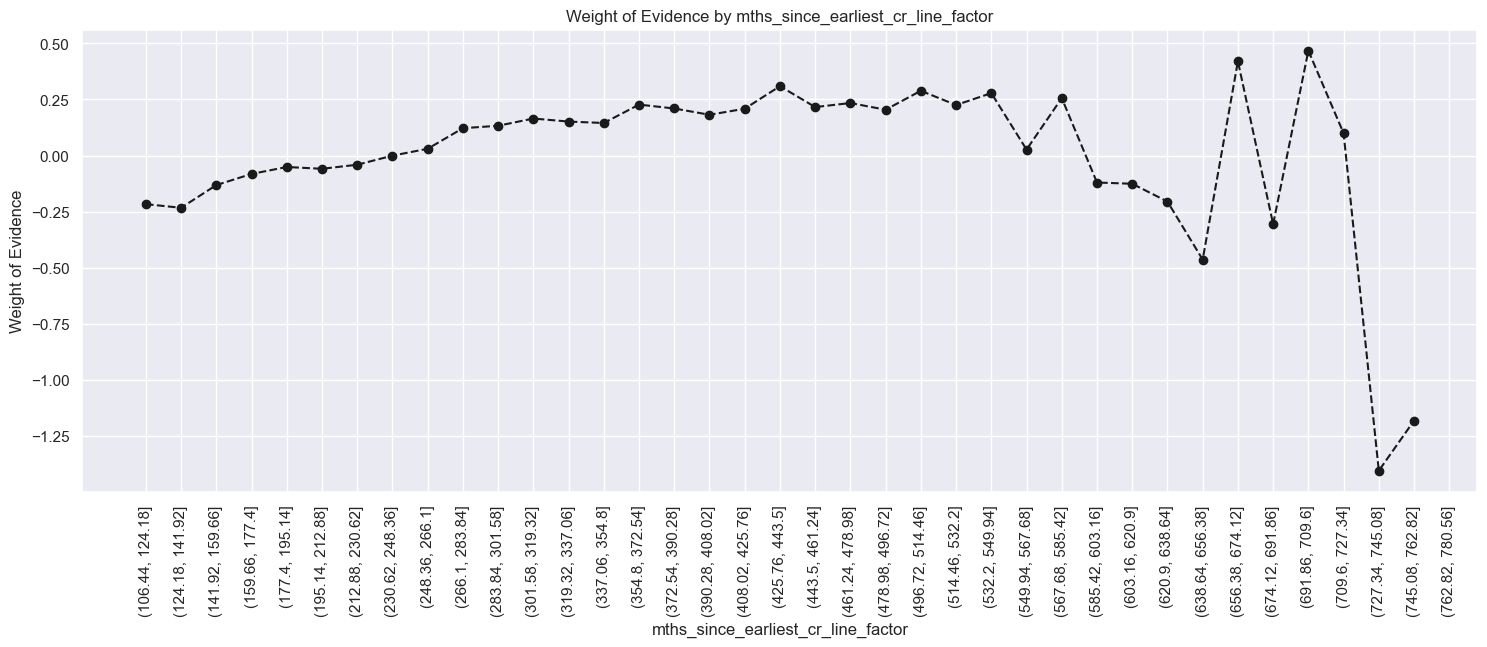

In [2078]:
# mths_since_earliest_cr_line

df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

plot_by_woe(df_temp.iloc[6: , : ], 90)

# We plot the weight of evidence values

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


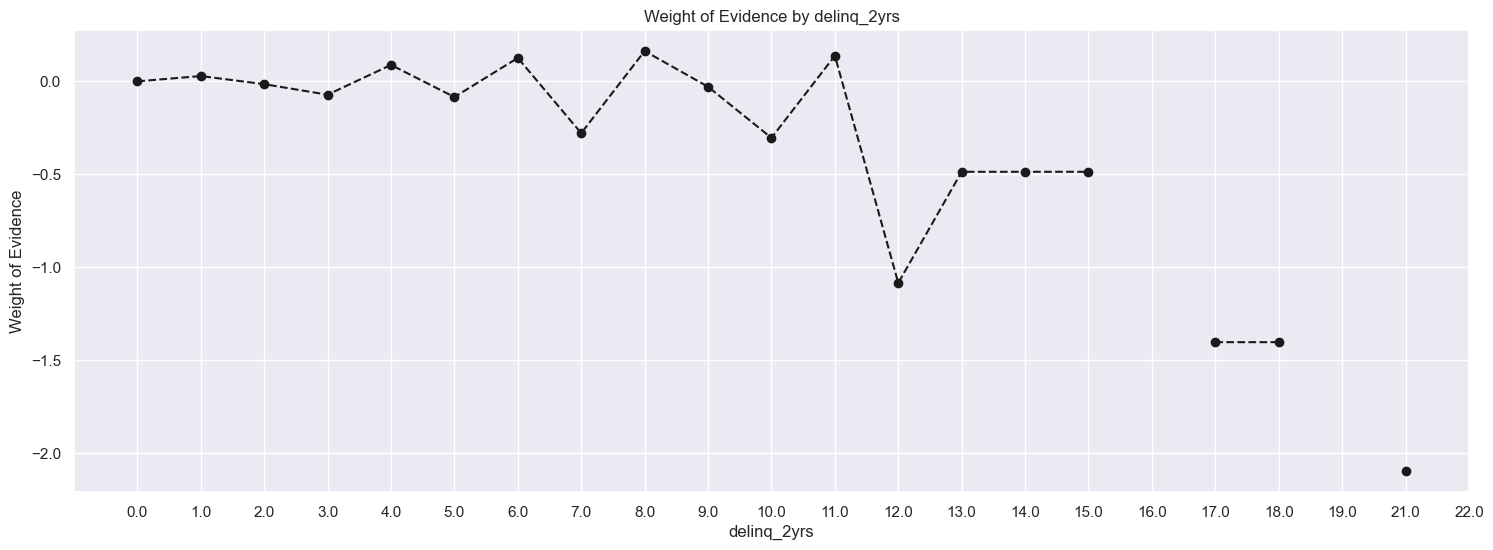

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


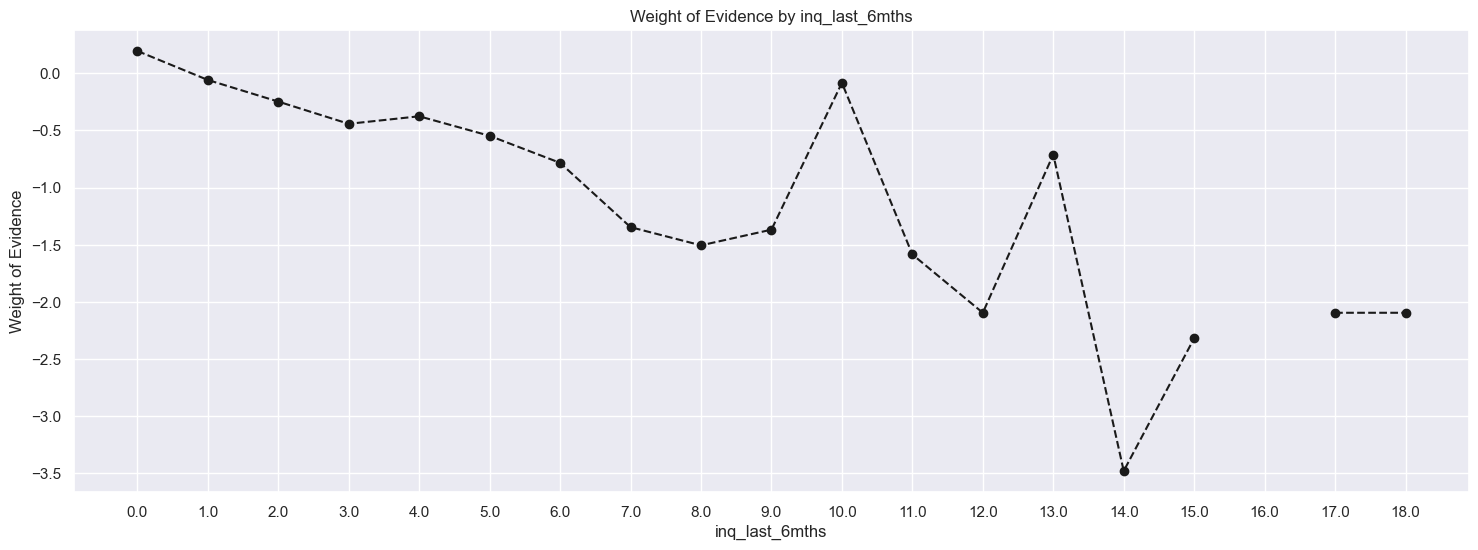

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


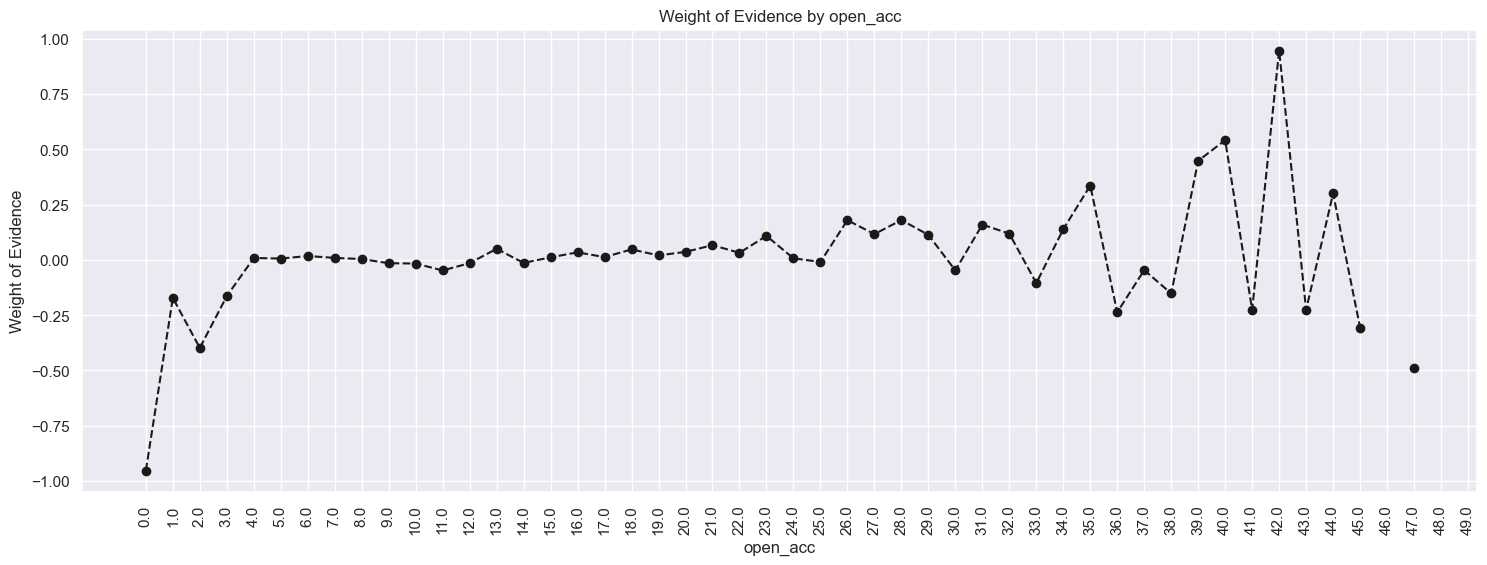

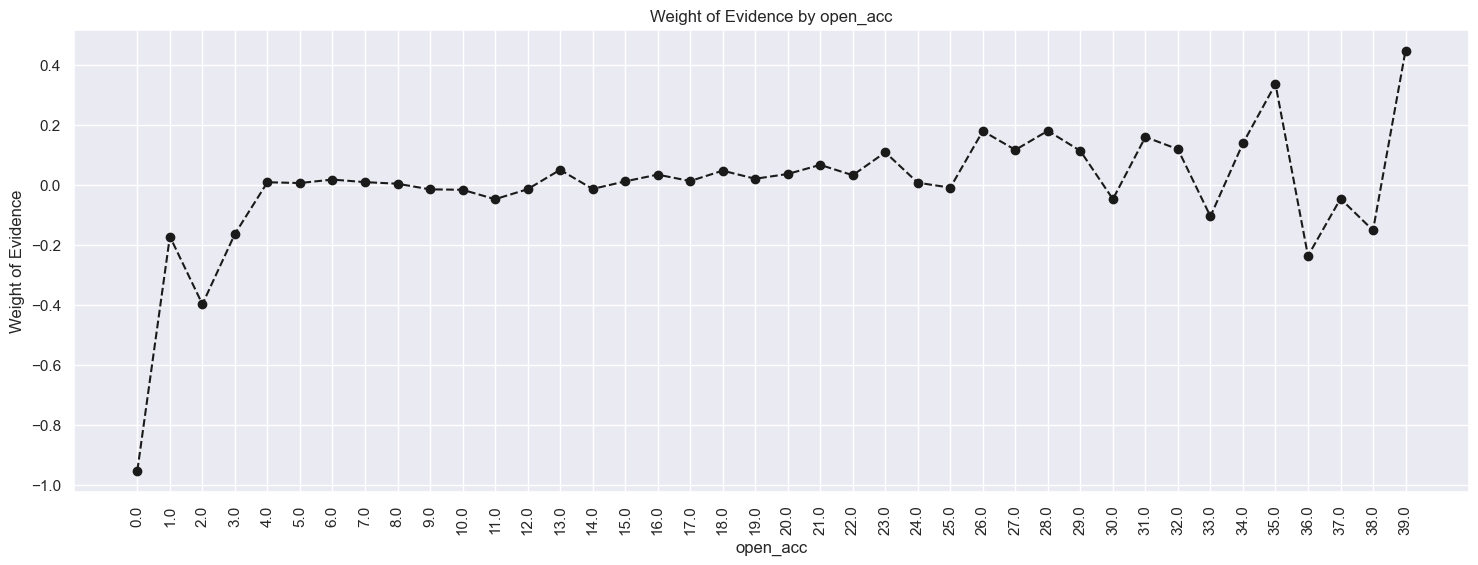

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


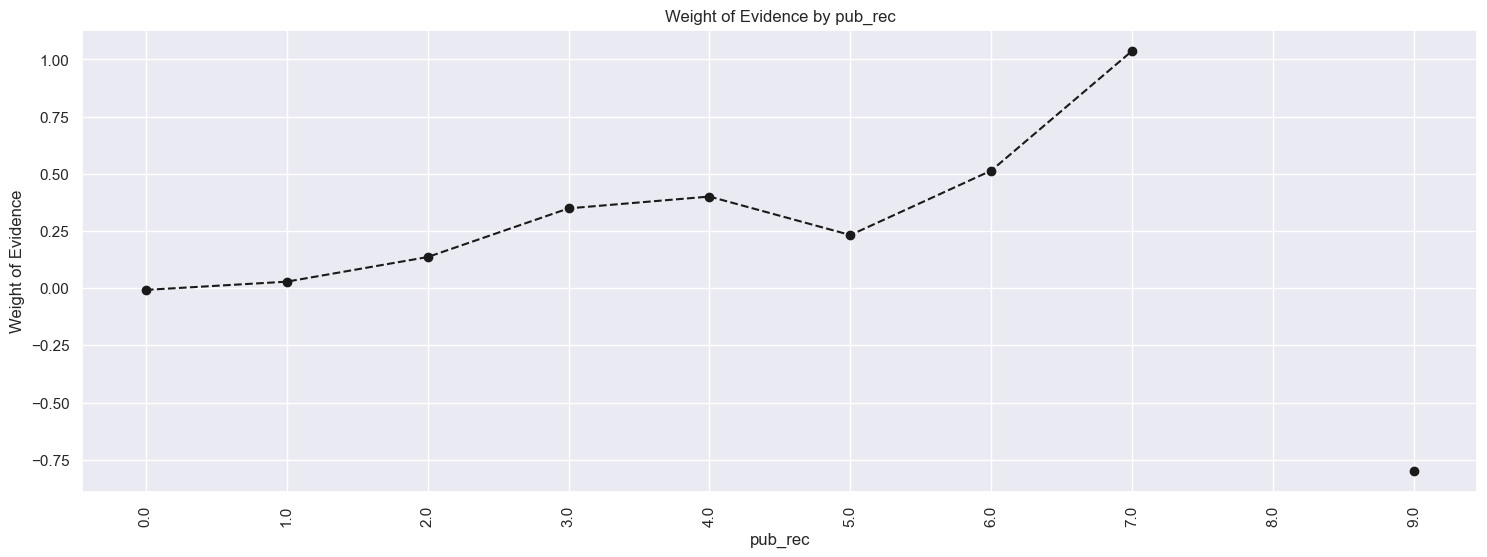

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


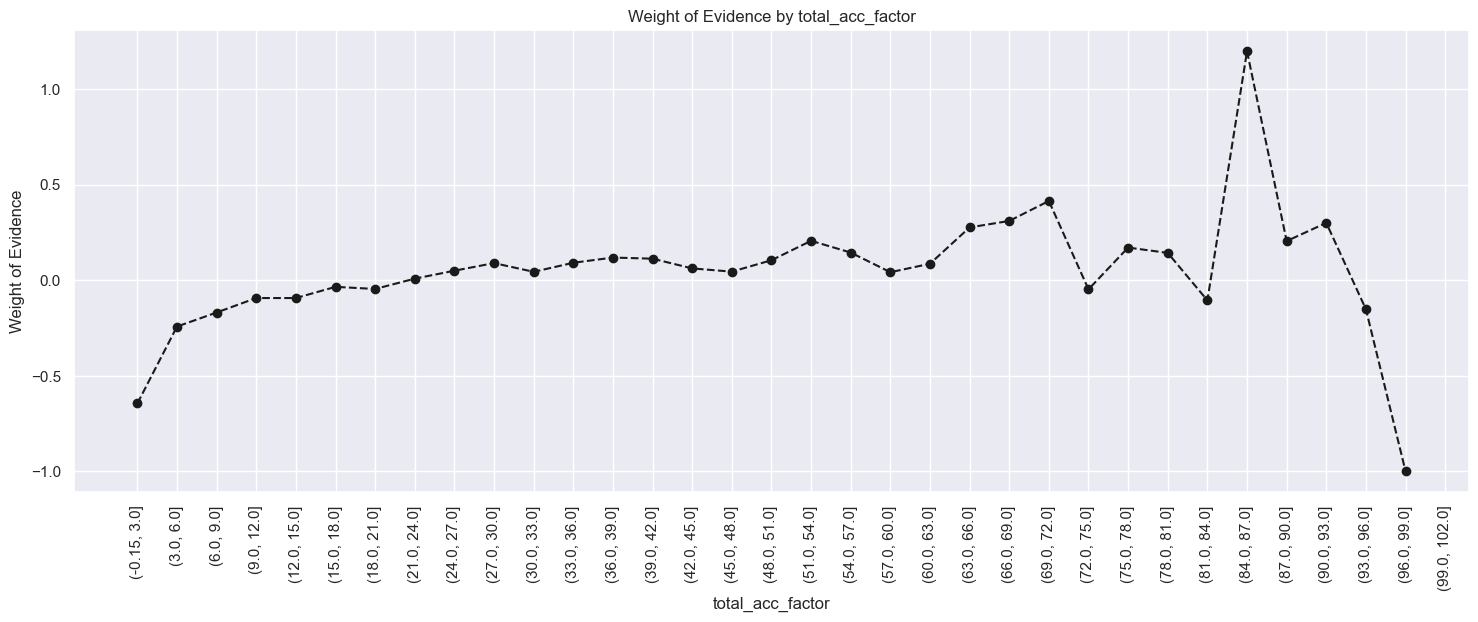

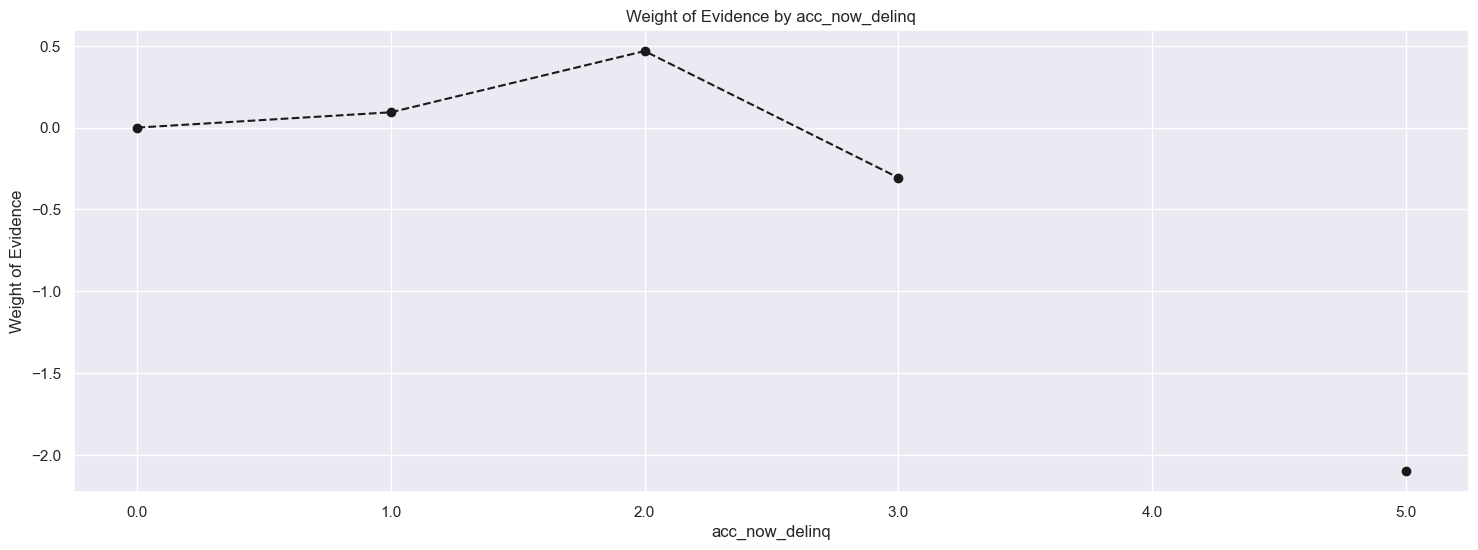

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


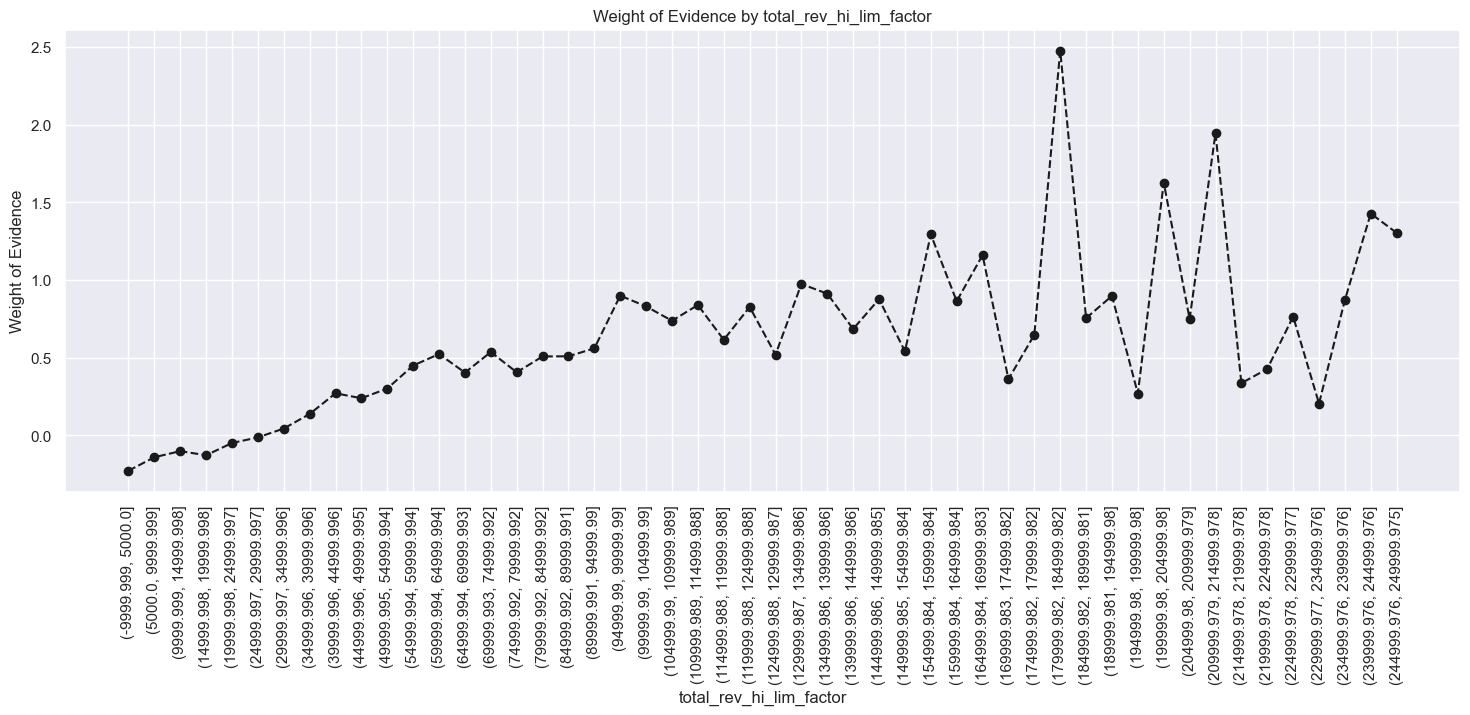

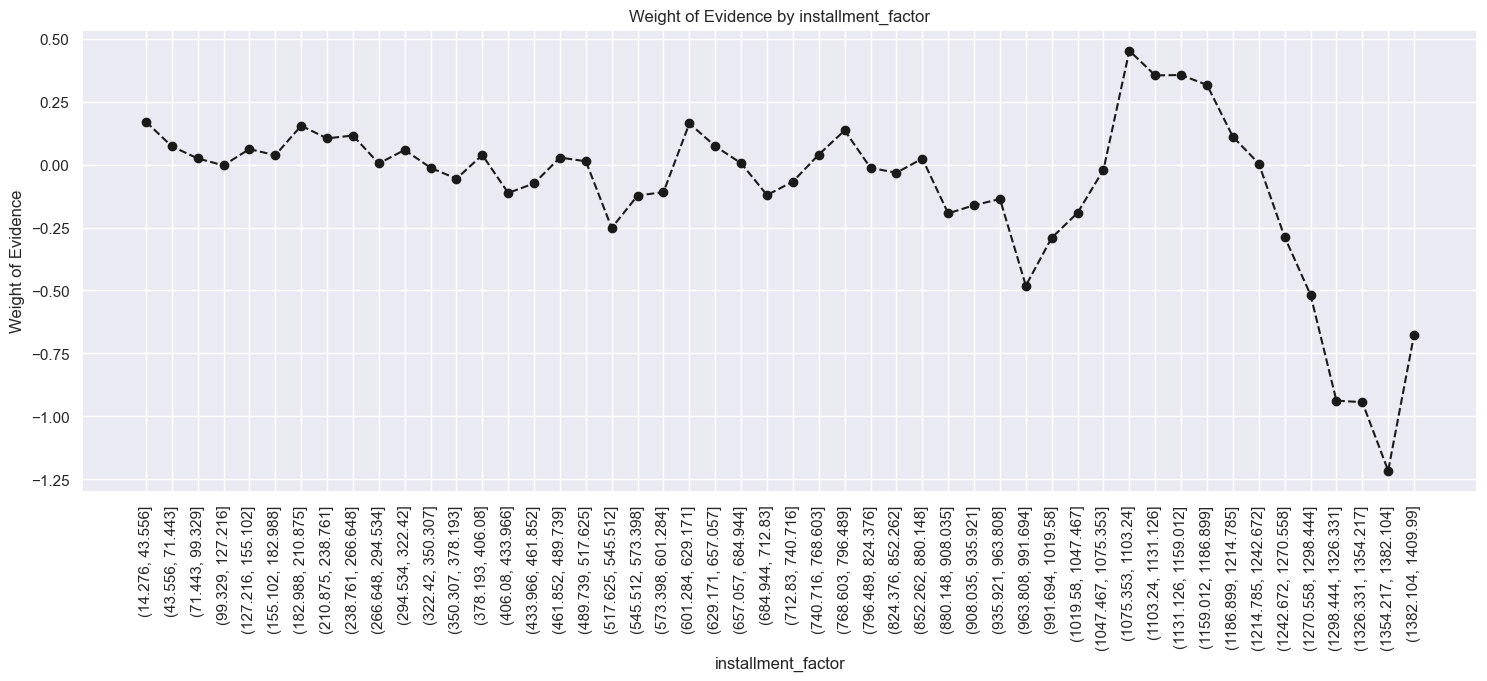

In [2079]:
# We create the following categories:

# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352

df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)

df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

# delinq_2yrs

df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp)

# We plot the weight of evidence values.

# Categories: 0, 1-3, >=4

df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)

df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)

df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

# inq_last_6mths

df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp)

# We plot the weight of evidence values.

# Categories: 0, 1 - 2, 3 - 6, > 6

df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)

df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)

df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)

df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

# open_acc

df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

plot_by_woe(df_temp.iloc[ : 40, :], 90)

# We plot the weight of evidence values.

# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'

df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)

df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)

df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)

df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)

df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)

df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)

df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)

df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

# pub_rec

df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories '0-2', '3-4', '>=5'

df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)

df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)

df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

# total_acc

df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories: '<=27', '28-51', '>51'

df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)

df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)

df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

# acc_now_delinq

df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp)

# We plot the weight of evidence values.

# Categories: '0', '>=1'

df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)

df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

# total_rev_hi_lim

df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp.iloc[: 50, : ], 90)

# We plot the weight of evidence values.

# Categories

# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'

df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)

df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

# installment

df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

#### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]
/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]
/var/folders/5_/b8kw9fy17y1flnr3r4lt__tw0000gn/T/ipykernel_94887/3464772724.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


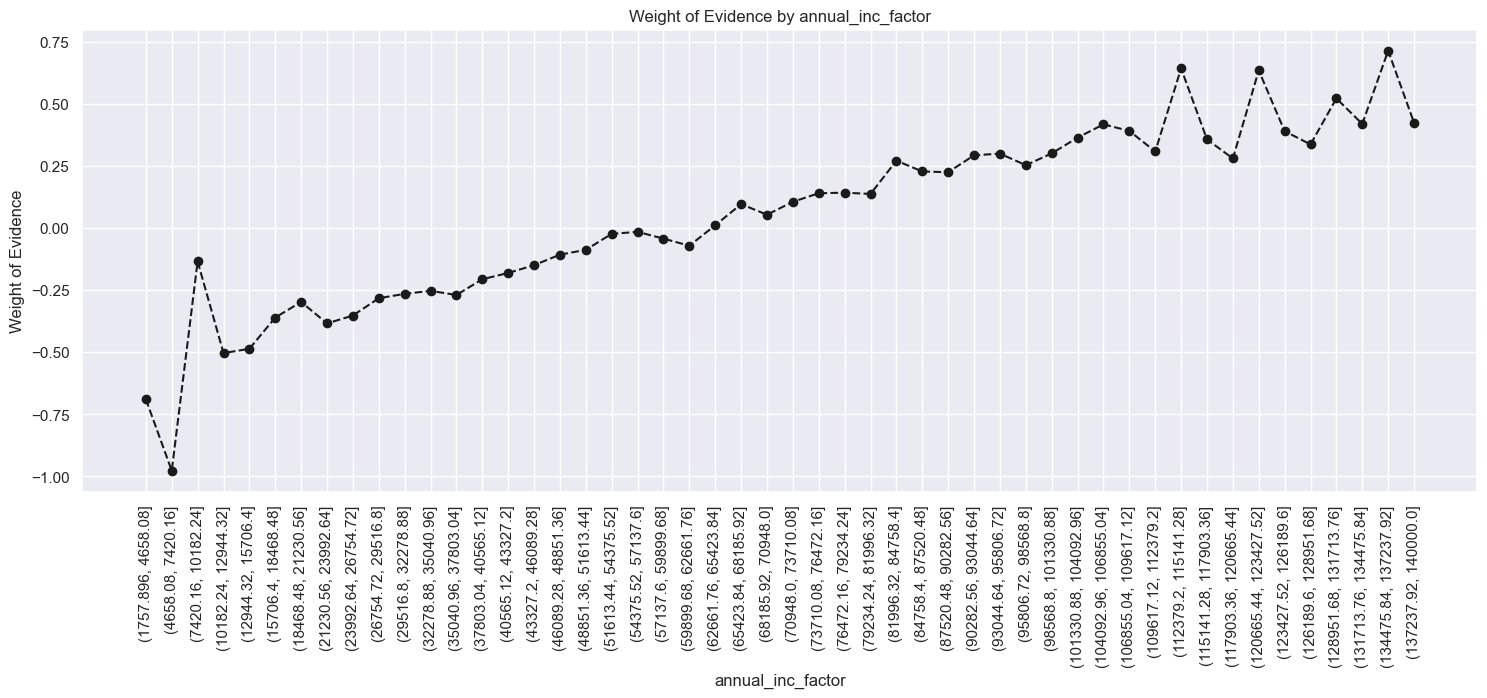

/var/folders/5_/b8kw9fy17y1flnr3r4lt__tw0000gn/T/ipykernel_94887/3464772724.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
/Users/yuanyi/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


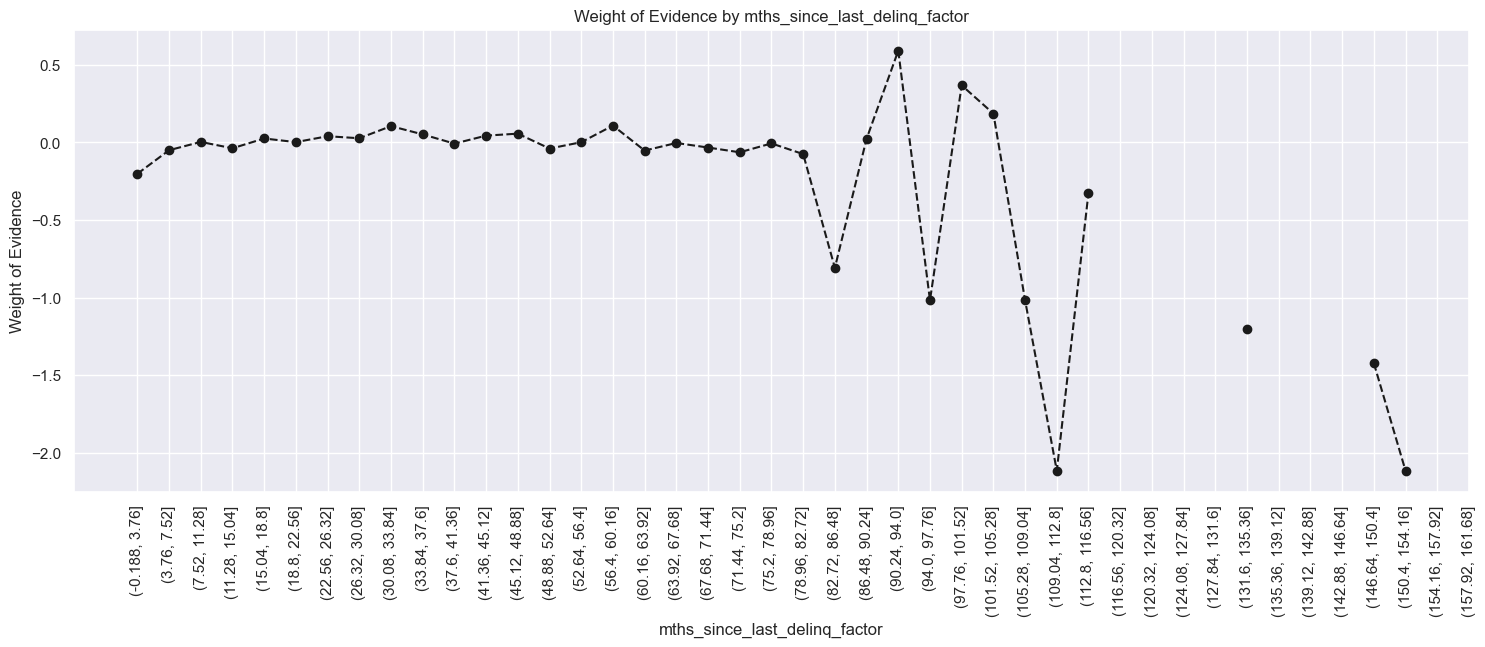

In [2081]:
# annual_inc

df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

# Initial examination shows that there are too few individuals with large income and too many with small income.

# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine

# the categories of everyone with 140k or less.

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

#loan_data_temp = loan_data_temp.reset_index(drop = True)

#df_inputs_prepr_temp

df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.

df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)

df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)

df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)

df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)

df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)

df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)

df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)

df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)

df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)

df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)

df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)

df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

# mths_since_last_delinq

# We have to create one category for missing values and do fine and coarse classing for the rest.

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]

df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories: Missing, 0-3, 4-30, 31-56, >=57

df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)

df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)

df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)

df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)

df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

#### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3: Homework

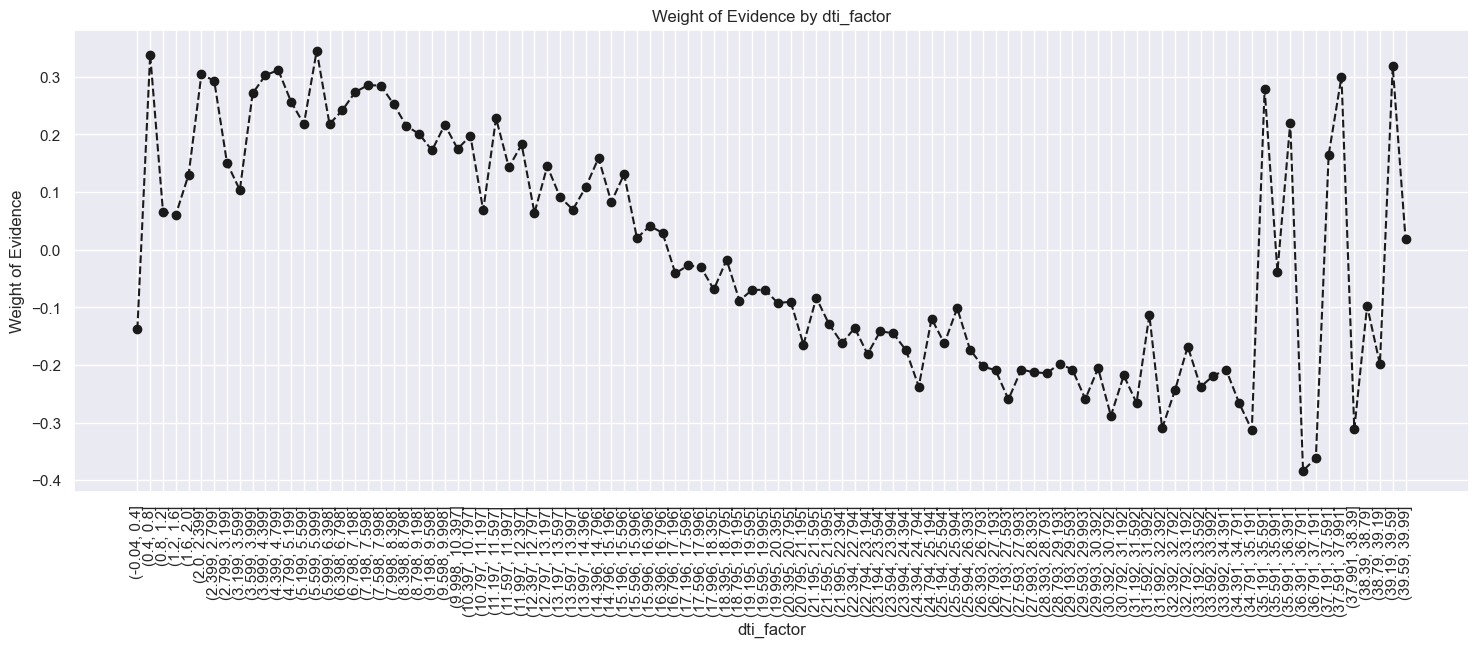

/var/folders/5_/b8kw9fy17y1flnr3r4lt__tw0000gn/T/ipykernel_94887/3637353528.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


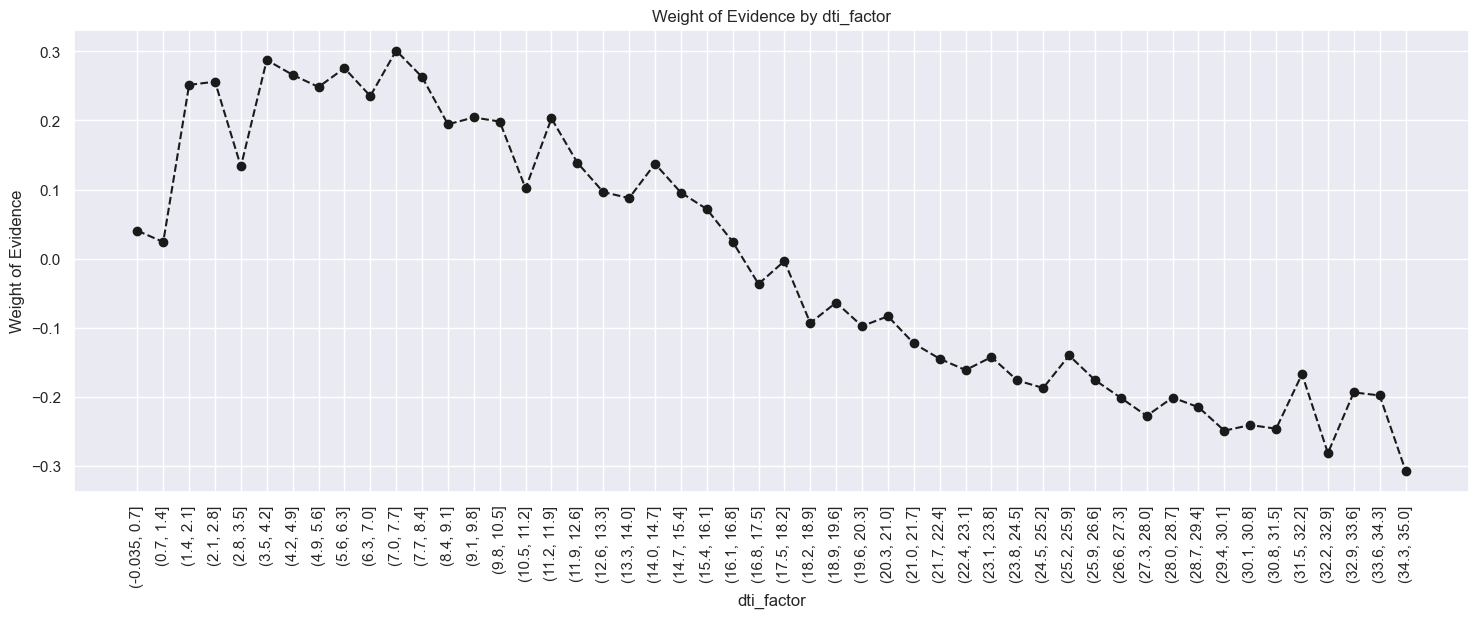

/var/folders/5_/b8kw9fy17y1flnr3r4lt__tw0000gn/T/ipykernel_94887/3637353528.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


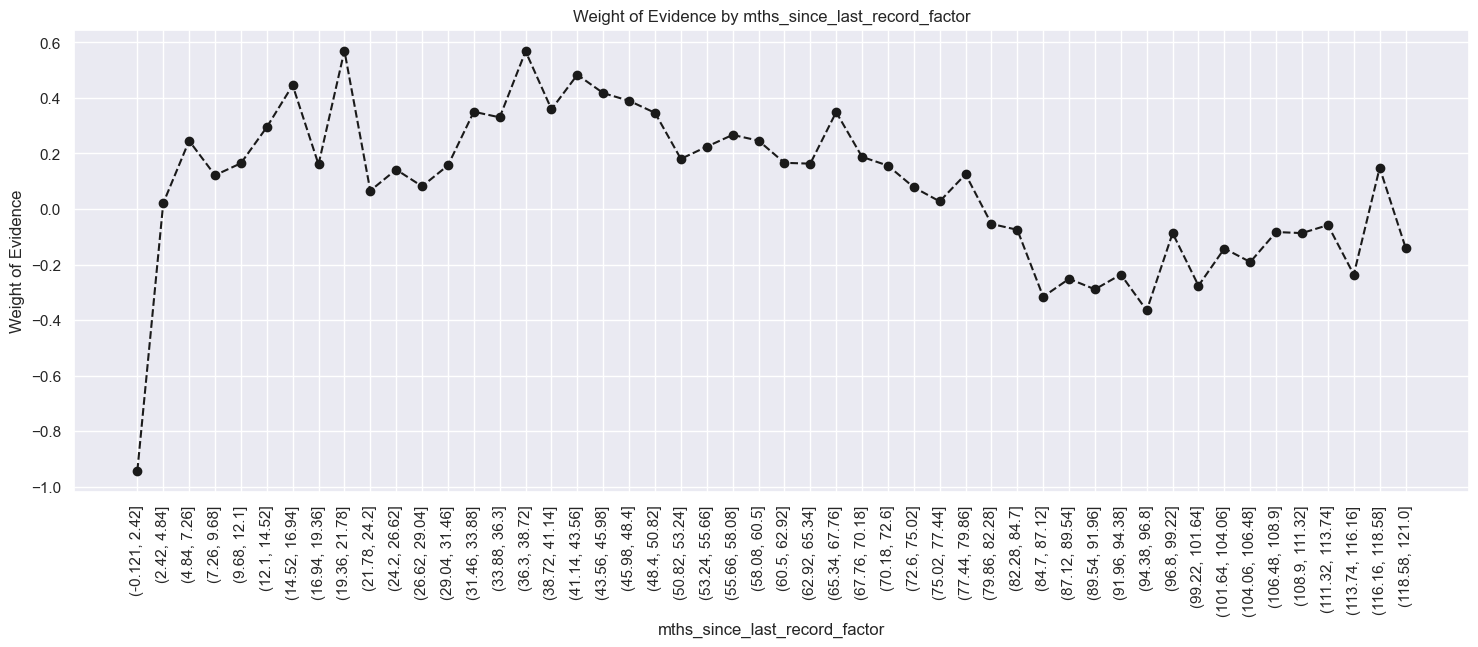

In [2083]:
# dti

df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)

# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Similarly to income, initial examination shows that most values are lower than 200.

# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine

# the categories of everyone with 150k or less.

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories:

df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)

df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)

df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)

df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)

df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)

df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)

df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)

df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)

df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)

df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

# mths_since_last_record

# We have to create one category for missing values and do fine and coarse classing for the rest.

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

#sum(loan_data_temp['mths_since_last_record'].isnull())

df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])

# We calculate weight of evidence.

df_temp

plot_by_woe(df_temp, 90)

# We plot the weight of evidence values.

# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'

df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)

df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)

df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)

df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)

df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)

df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)

df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

#### Preprocessing the Test Dataset

In [2085]:
df_inputs_prepr.head()

/Users/yuanyi/anaconda3/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,todays_date,Days_since_earliest_cr_line,mths_since_earliest_cr_line,issue_d_date,Days_since_issue_d,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_ra

In [2086]:
loan_data_inputs_train = df_inputs_prepr
#####
#loan_data_inputs_test = df_inputs_prepr

In [2087]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')

loan_data_targets_train.to_csv('loan_data_targets_train.csv')

In [2088]:
#loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')

#loan_data_targets_test.to_csv('loan_data_targets_test.csv')